## Install packages

In [1]:
!pip install git+https://github.com/NaleRaphael/goertzel-fft.git

  Cloning https://github.com/NaleRaphael/goertzel-fft.git to c:\users\nale\appdata\local\temp\pip-req-build-f3e0_jcy
  Created wheel for gofft: filename=gofft-1.0.0-cp37-cp37m-win_amd64.whl size=21129 sha256=22e5bc4ccfef3d7ba4bb0eddc3c1e7ec86038e2e2defc6b80717703b6a887ddc
  Stored in directory: C:\Users\nale\AppData\Local\Temp\pip-ephem-wheel-cache-o3jaa4oz\wheels\0b\ae\71\71126f3d7a757518229952815d4b9809e8de858d72fbb935b4
Successfully built gofft


  Running command git clone -q https://github.com/NaleRaphael/goertzel-fft.git 'C:\Users\nale\AppData\Local\Temp\pip-req-build-f3e0_jcy'


In [4]:
import numpy as np
import gofft

fs = 1000   # sampling frequency
ft = 60     # target frequency to be evaluated (60 Hz)
dur = 2     # duration of signal
num = fs*dur  # sampling points
t = np.linspace(0, dur, num)  # time series
data = np.sin(2*np.pi*ft*t)   # signal to be evaluated (60 Hz)

mag = gofft.alg.goertzel(data, fs, ft, fs)
print(mag)  # 0.4969141358692001

0.4969141358692001


## Signal

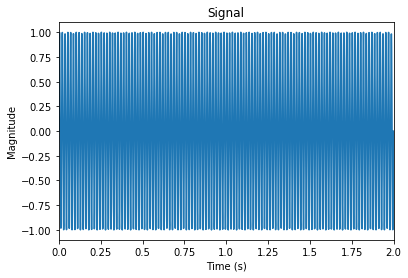

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
plt.plot(data)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/fs))
ax.set_xlim(0, len(t))
ax.set_title('Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude')

plt.show()

## Spectrum

120 0.49691413586920474


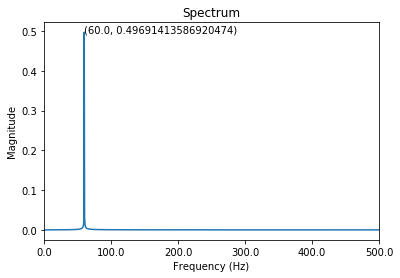

In [43]:
from scipy.fftpack import fft as scipyfft

spectrum = np.abs(scipyfft(data)) / data.size
l_half = spectrum.size // 2

# find max frequency in spectrum
idx_max = np.argmax(spectrum)

fig, ax = plt.subplots()
plt.plot(spectrum[:l_half])

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/2))
ax.set_xlim(0, l_half)
ax.set_title('Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

ax.annotate(
    '({}, {})'.format(idx_max/num*fs, spectrum[idx_max]),
    (idx_max, spectrum[idx_max])
)

plt.show()